<a href="https://colab.research.google.com/github/AnkitFSM/deeplearning/blob/main/Group_13_water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# 1.0.2
# Simplify file path handling
from pathlib import Path

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [17]:
# Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
# Where is our data:

pathToFolder = "/gdrive/MyDrive/deeplearning"

In [19]:
# specific path to the dataset file

path = Path(pathToFolder) / "water_potability.csv"

In [20]:
# Load the data
df = pd.read_csv(path)

In [21]:
df

sample        ph    Hardness       Solids  Chloramines     Sulfate  \
0          1       NaN  204.890456  20791.31898     7.300212  368.516441   
1          2  3.716080  129.422921  18630.05786     6.635246         NaN   
2          3  8.099124  224.236259  19909.54173     9.275884         NaN   
3          4  8.316766  214.373394  22018.41744     8.059332  356.886136   
4          5  9.092223  181.101509  17978.98634     6.546600  310.135738   
...      ...       ...         ...          ...          ...         ...   
3271    3272  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272    3273  7.808856  193.553212  17329.80216     8.061362         NaN   
3273    3274  9.419510  175.762646  33155.57822     7.350233         NaN   
3274    3275  5.126763  230.603758  11983.86938     6.303357         NaN   
3275    3276  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 11 columns]

In [22]:
df.shape

(3276, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample           3276 non-null   int64  
 1   ph               2785 non-null   float64
 2   Hardness         3276 non-null   float64
 3   Solids           3276 non-null   float64
 4   Chloramines      3276 non-null   float64
 5   Sulfate          2495 non-null   float64
 6   Conductivity     3276 non-null   float64
 7   Organic_carbon   3276 non-null   float64
 8   Trihalomethanes  3114 non-null   float64
 9   Turbidity        3276 non-null   float64
 10  Potability       3276 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 281.7 KB


In [25]:
df.describe()

sample           ph     Hardness        Solids  Chloramines  \
count  3276.000000  2785.000000  3276.000000   3276.000000  3276.000000   
mean   1638.500000     7.080795   196.369496  22014.092526     7.122277   
std     945.844067     1.594320    32.879761   8768.570828     1.583085   
min       1.000000     0.000000    47.432000    320.942611     0.352000   
25%     819.750000     6.093092   176.850538  15666.690300     6.127421   
50%    1638.500000     7.036752   196.967627  20927.833605     7.130299   
75%    2457.250000     8.062066   216.667456  27332.762125     8.114887   
max    3276.000000    14.000000   323.124000  61227.196010    13.127000   

           Sulfate  Conductivity  Organic_carbon  Trihalomethanes  \
count  2495.000000   3276.000000     3276.000000      3114.000000   
mean    333.775777    426.205111       14.284970        66.396293   
std      41.416840     80.824064        3.308162        16.175008   
min     129.000000    181.483754        2.200000         0.738000   
25%     307.699498    365.734414       12.065801        55.844536   
50%     333.073546    421.884968       14.218338        66.622485   
75%     359.950170    481.792305       16.557652        77.337473   
max     481.030642    753.342620       28.300000       124.000000   

         Turbidity   Potability  
count  3276.000000  3276.000000  
mean      3.966786     0.390110  
std       0.780382     0.487849  
min       1.450000     0.000000  
25%       3.439711     0.000000  
50%       3.955028     0.000000  
75%       4.500320     1.000000  
max       6.739000     1.000000

In [26]:
# Missing Values
df.isnull().sum()

sample               0
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [27]:
df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

sample        ph    Hardness       Solids  Chloramines     Sulfate  \
0       1  7.080795  204.890456  20791.31898     7.300212  368.516441   
1       2  3.716080  129.422921  18630.05786     6.635246  333.775777   
2       3  8.099124  224.236259  19909.54173     9.275884  333.775777   
3       4  8.316766  214.373394  22018.41744     8.059332  356.886136   
4       5  9.092223  181.101509  17978.98634     6.546600  310.135738   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0    564.308654       10.379783        86.990970   2.963135           0  
1    592.885359       15.180013        56.329076   4.500656           0  
2    418.606213       16.868637        66.420093   3.055934           0  
3    363.266516       18.436525       100.341674   4.628771           0  
4    398.410813       11.558279        31.997993   4.075075           0

In [28]:
# Missing Values recheck
df.isnull().sum()

sample             0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Figure size 1500x1500 with 0 Axes>

Text(0.5, 1.0, 'Univariate Analysis of Numerical Features')

<Axes: >

<Axes: xlabel='sample', ylabel='Density'>

Text(0.5, 0, 'sample')

<Axes: >

<Axes: xlabel='ph', ylabel='Density'>

Text(0.5, 0, 'ph')

<Axes: >

<Axes: xlabel='Hardness', ylabel='Density'>

Text(0.5, 0, 'Hardness')

<Axes: >

<Axes: xlabel='Solids', ylabel='Density'>

Text(0.5, 0, 'Solids')

<Axes: >

<Axes: xlabel='Chloramines', ylabel='Density'>

Text(0.5, 0, 'Chloramines')

<Axes: >

<Axes: xlabel='Sulfate', ylabel='Density'>

Text(0.5, 0, 'Sulfate')

<Axes: >

<Axes: xlabel='Conductivity', ylabel='Density'>

Text(0.5, 0, 'Conductivity')

<Axes: >

<Axes: xlabel='Organic_carbon', ylabel='Density'>

Text(0.5, 0, 'Organic_carbon')

<Axes: >

<Axes: xlabel='Trihalomethanes', ylabel='Density'>

Text(0.5, 0, 'Trihalomethanes')

<Axes: >

<Axes: xlabel='Turbidity', ylabel='Density'>

Text(0.5, 0, 'Turbidity')

<Axes: >

<Axes: xlabel='Potability', ylabel='Density'>

Text(0.5, 0, 'Potability')

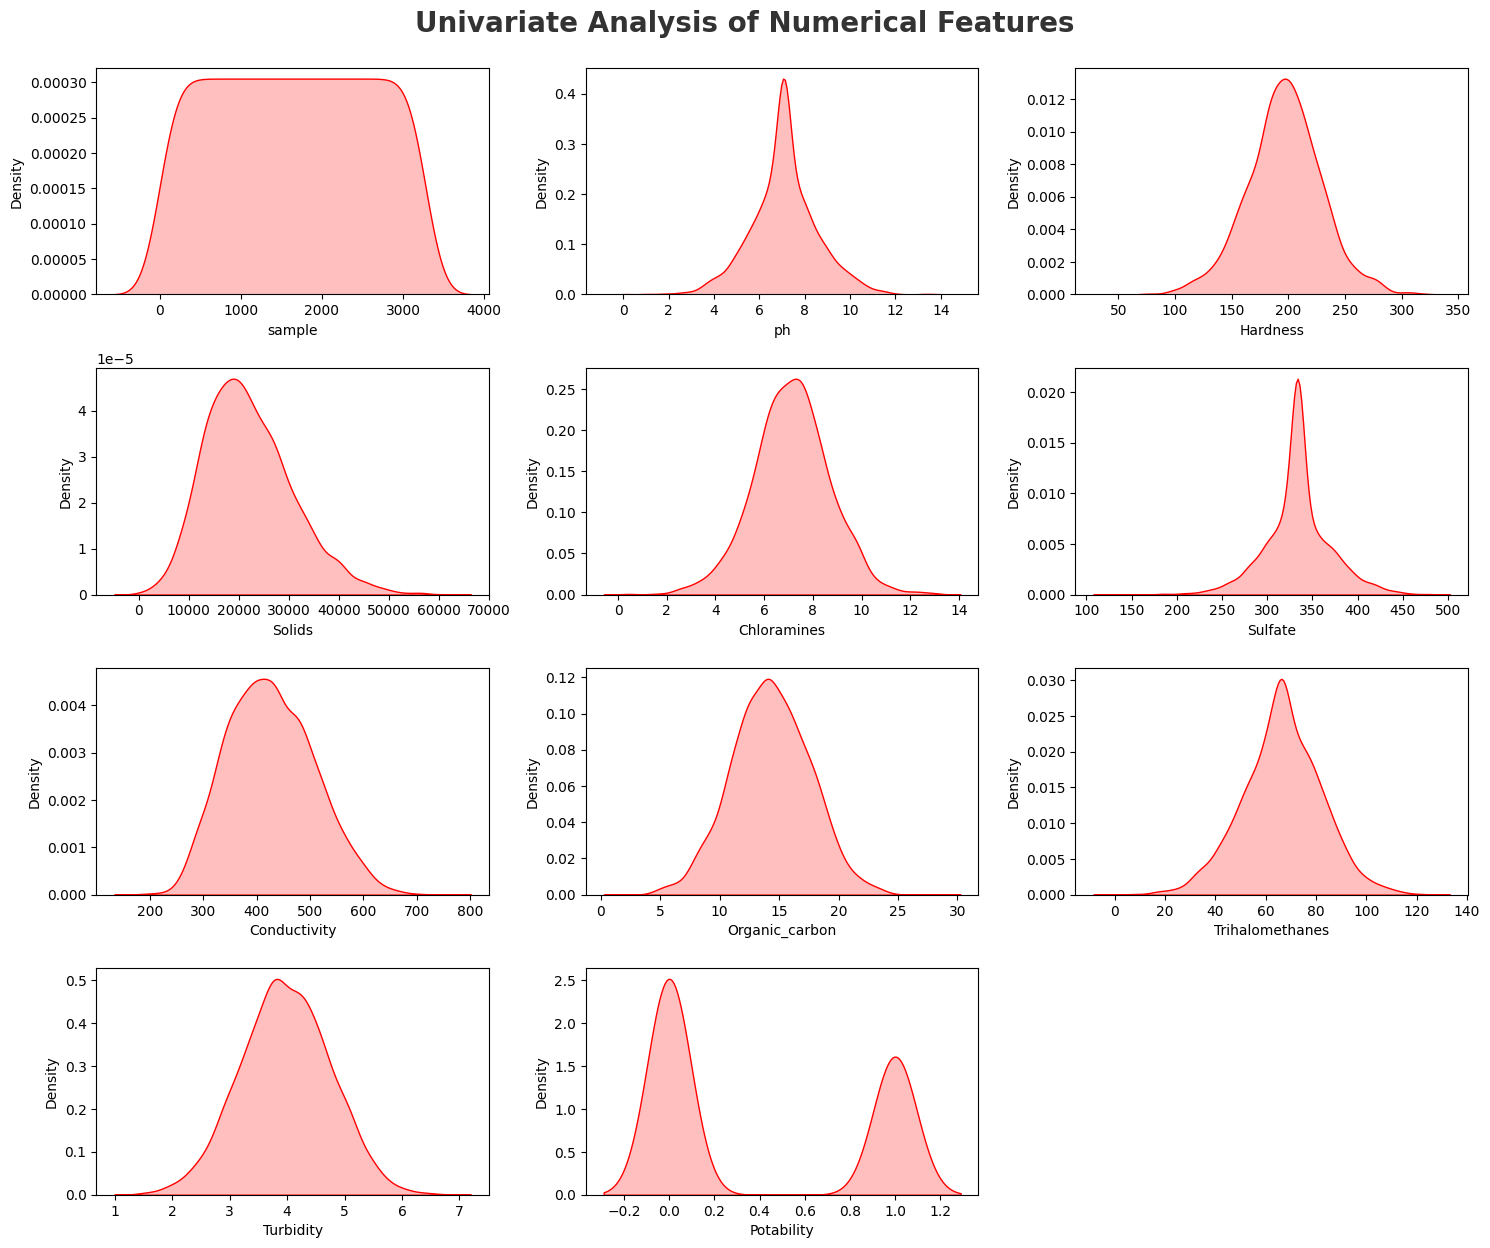

In [29]:
## Proportion of count data on numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: ylabel='Potability'>

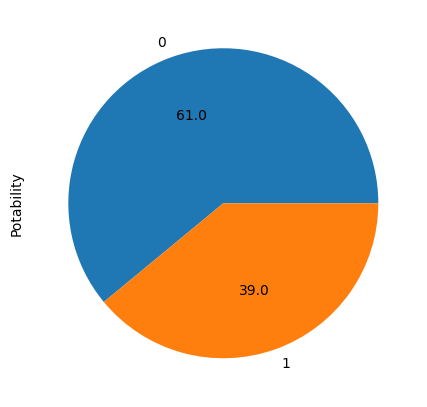

In [35]:
df['Potability'].value_counts().plot.pie(y=df['Potability'],figsize=(5,6),autopct='%1.1f')

<Axes: >

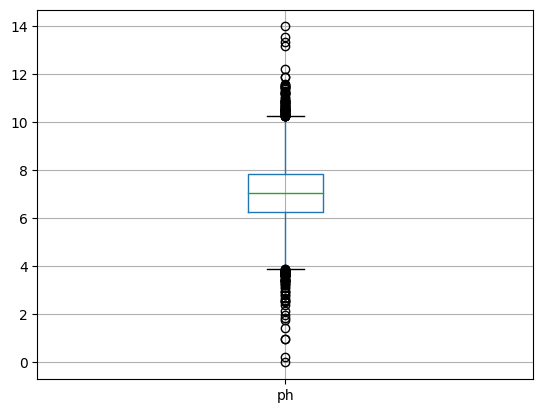

In [36]:
#Boxplot

df[['ph']].boxplot()

<Axes: >

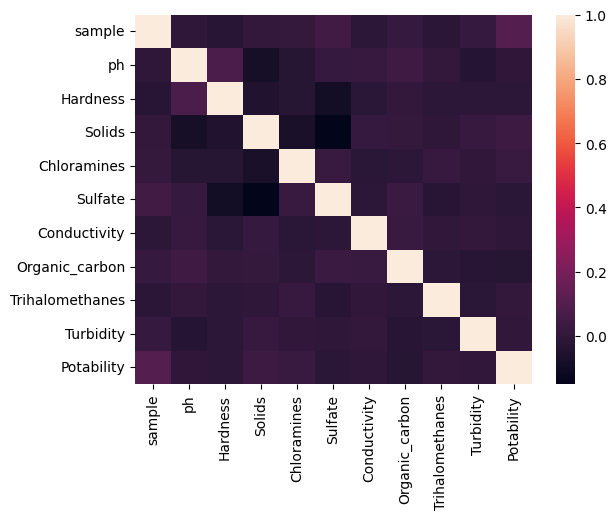

In [37]:
#Correlation plot

sns.heatmap(df.corr())

Text(0.5, 1.02, 'Pairplot of Numerical Variables')

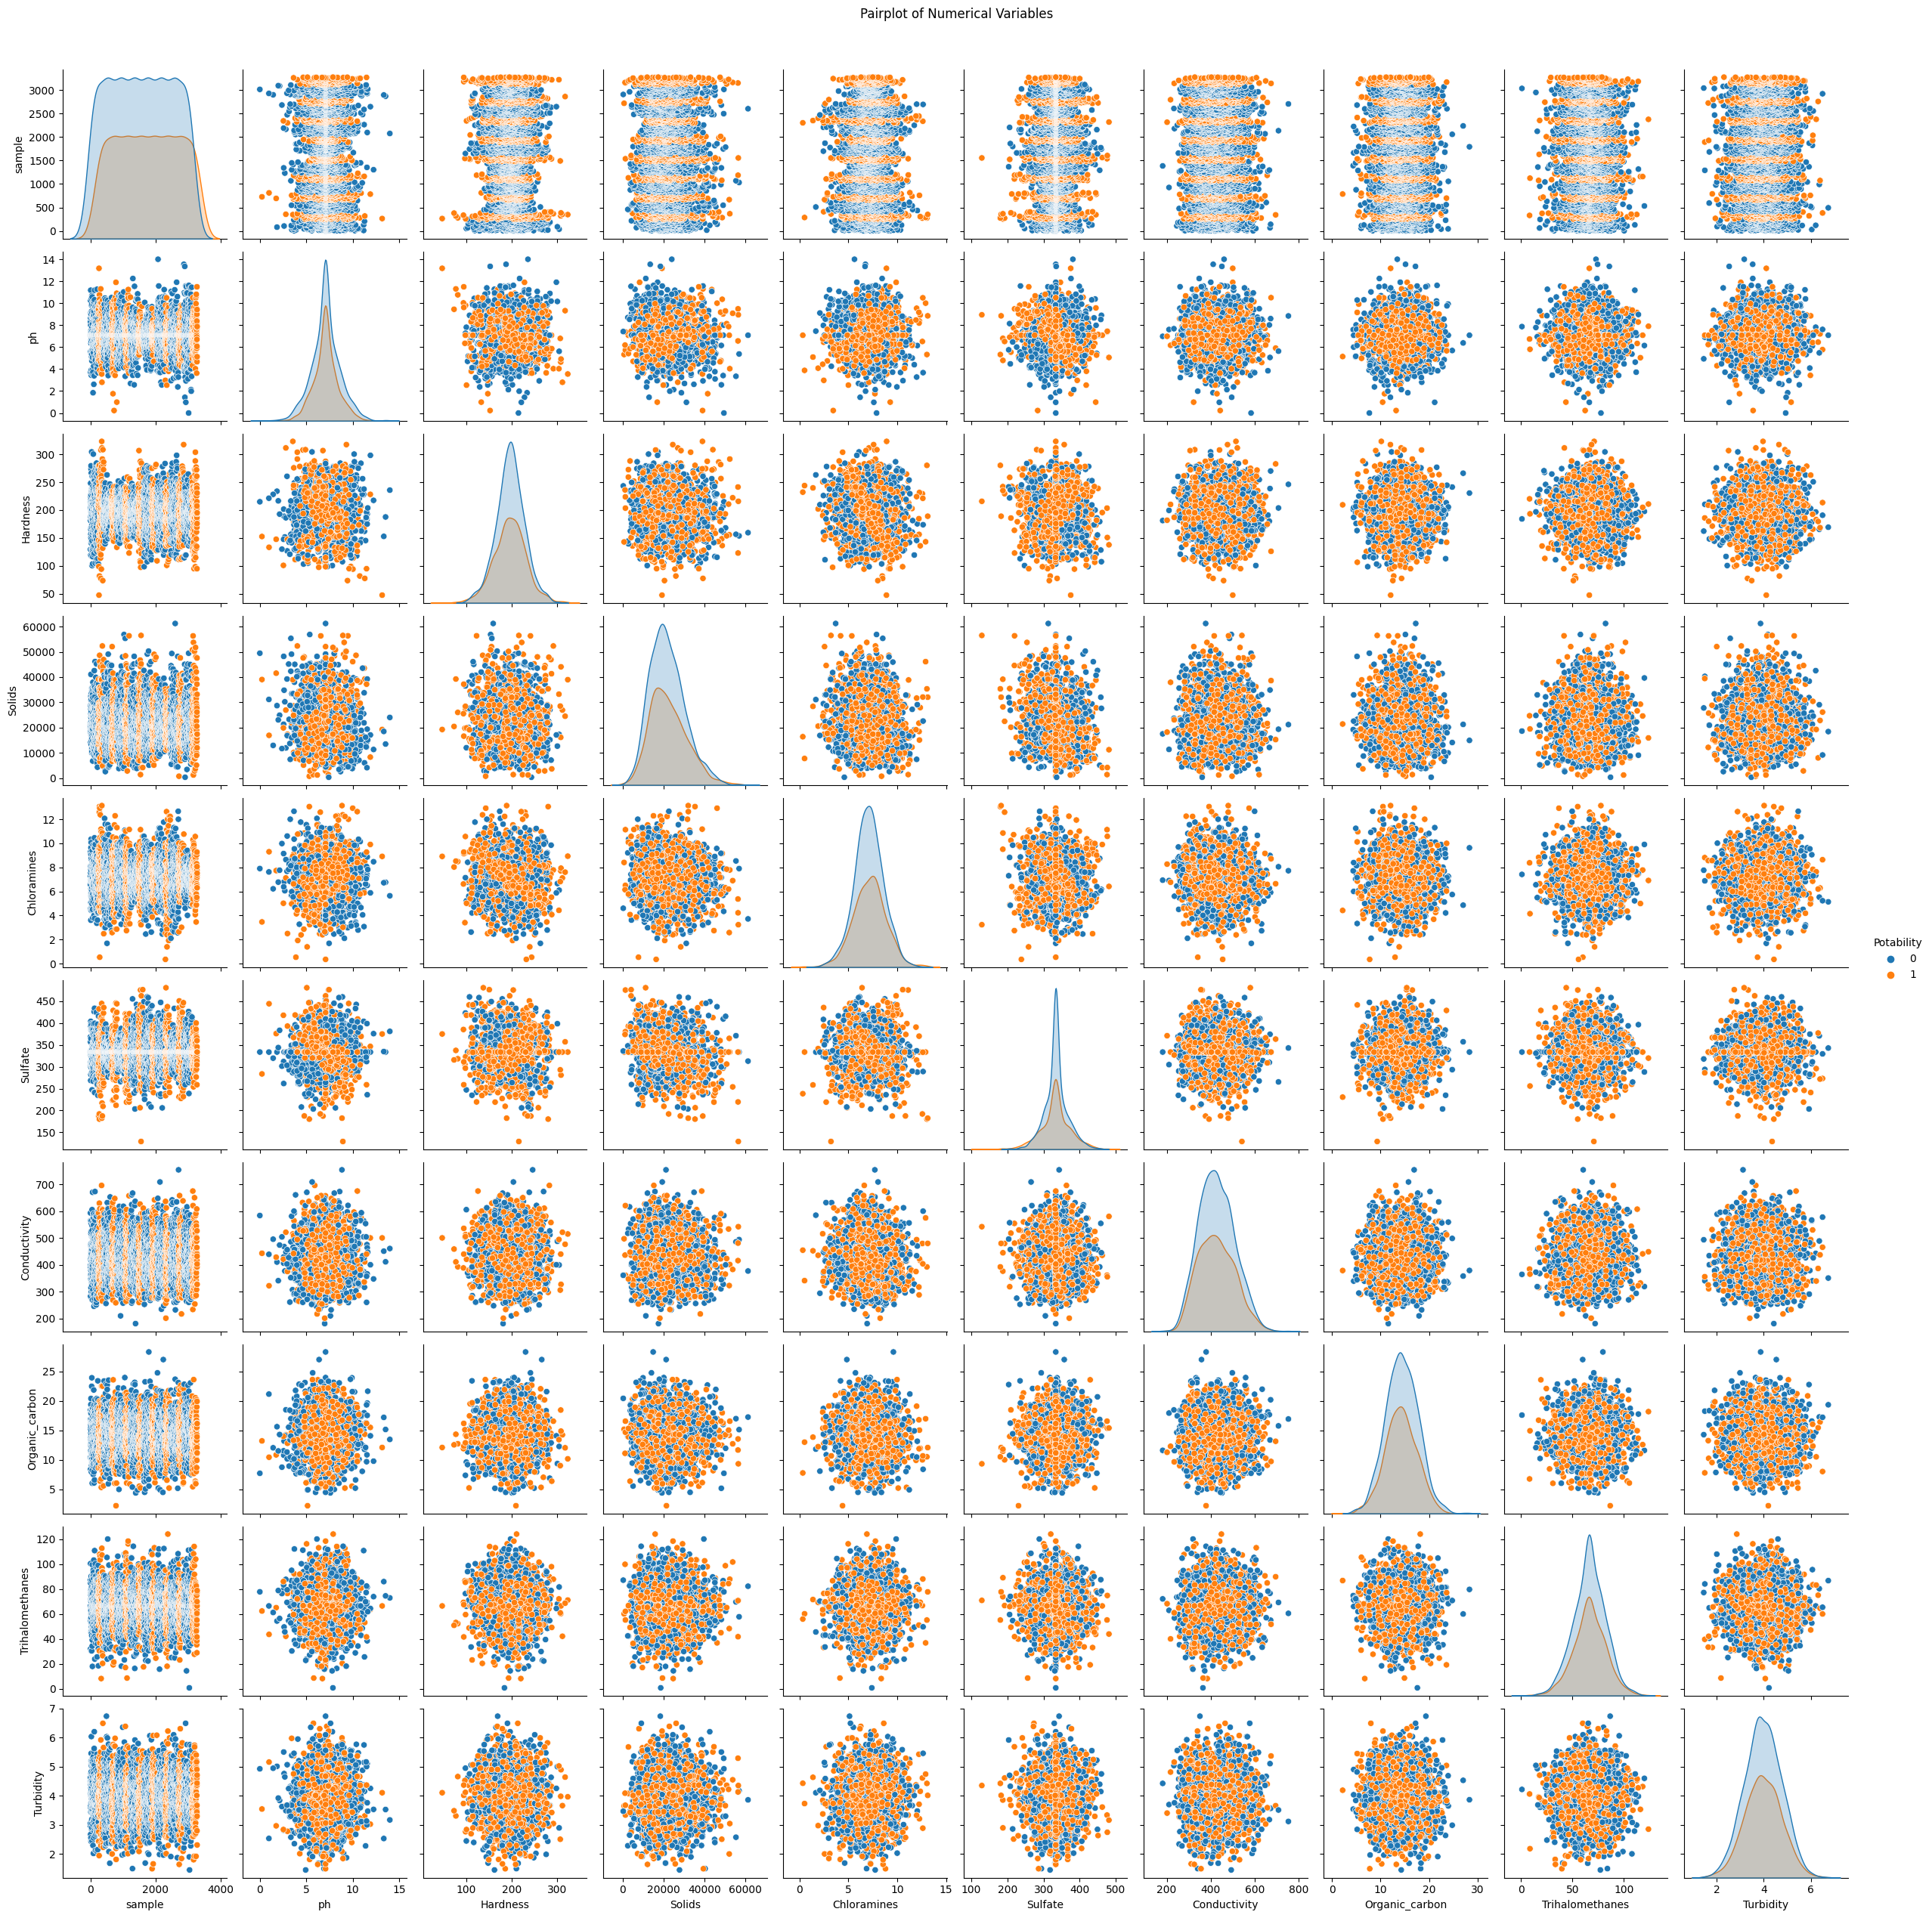

In [41]:
# Create a pairplot
sns.pairplot(df, hue='Potability')
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Boxplots of Numerical Features')

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'ph'),
  Text(2, 0, 'Hardness'),
  Text(3, 0, 'Solids'),
  Text(4, 0, 'Chloramines'),
  Text(5, 0, 'Sulfate'),
  Text(6, 0, 'Conductivity'),
  Text(7, 0, 'Organic_carbon'),
  Text(8, 0, 'Trihalomethanes'),
  Text(9, 0, 'Turbidity')])

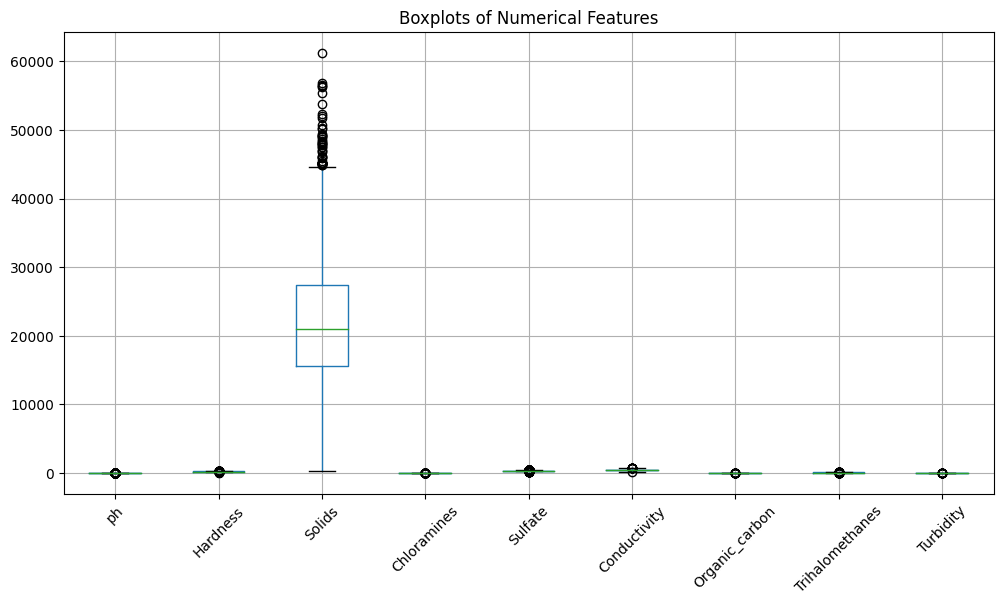

In [42]:
# Create boxplots for numerical features
plt.figure(figsize=(12, 6))
df.drop(columns=['sample', 'Potability']).boxplot()
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

Text(0.5, 1.02, 'Histograms of Numerical Features')

<Figure size 1200x800 with 0 Axes>

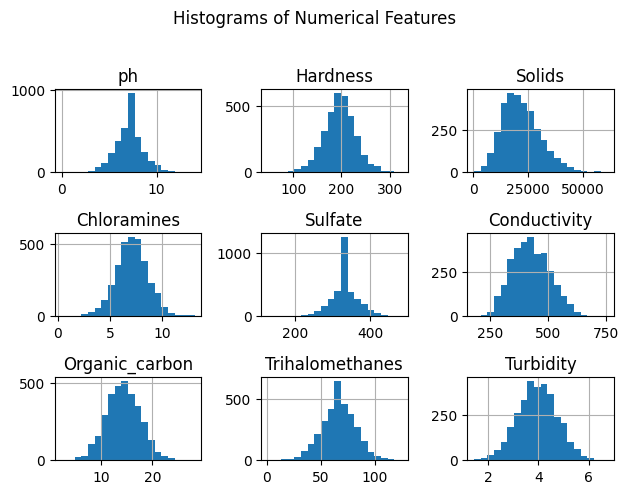

In [43]:
# Create histograms for numerical features
plt.figure(figsize=(12, 8))
df.drop(columns=['sample', 'Potability']).hist(bins=20)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [93]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['sample', 'Potability'])
y = df['Potability']

In [123]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:

# Create the neural network model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)))

model.add(tf.keras.layers.Dense(30, activation='relu'))  # Change from 40 to 30


In [126]:
# Add a dropout layer
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(20, activation='relu'))

# Add a dropout layer
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(15, activation='relu'))

# Add a dropout layer
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

# No need for a dropout layer after the last hidden layer

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [127]:
# Model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                300       
                                                                 
 dropout_21 (Dropout)        (None, 30)                0         
                                                                 
 dense_37 (Dense)            (None, 20)                620       
                                                                 
 dropout_22 (Dropout)        (None, 20)                0         
                                                                 
 dense_38 (Dense)            (None, 15)                315       
                                                                 
 dropout_23 (Dropout)        (None, 15)                0         
                                                                 
 dense_39 (Dense)            (None, 10)               

In [128]:
# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',  # Use Adam optimizer
    metrics=['acc']
)


In [129]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_data=(X_test_scaled, y_test)
)


Epoch 1/200
82/82 [==============================] - 2s 5ms/step - loss: 0.7293 - acc: 0.4267 - val_loss: 0.6795 - val_acc: 0.6143
Epoch 2/200
82/82 [==============================] - 0s 3ms/step - loss: 0.6789 - acc: 0.5908 - val_loss: 0.6615 - val_acc: 0.6280
Epoch 3/200
82/82 [==============================] - 0s 3ms/step - loss: 0.6747 - acc: 0.6065 - val_loss: 0.6599 - val_acc: 0.6280
Epoch 4/200
82/82 [==============================] - 0s 3ms/step - loss: 0.6726 - acc: 0.6050 - val_loss: 0.6593 - val_acc: 0.6280
Epoch 5/200
82/82 [==============================] - 0s 4ms/step - loss: 0.6719 - acc: 0.6053 - val_loss: 0.6582 - val_acc: 0.6280
Epoch 6/200
82/82 [==============================] - 0s 4ms/step - loss: 0.6696 - acc: 0.6053 - val_loss: 0.6579 - val_acc: 0.6280
Epoch 7/200
82/82 [==============================] - 0s 4ms/step - loss: 0.6691 - acc: 0.6057 - val_loss: 0.6560 - val_acc: 0.6280
Epoch 8/200
82/82 [==============================] - 0s 3ms/step - loss: 0.6666 - a

In [130]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


21/21 [==============================] - 0s 3ms/step - loss: 0.5933 - acc: 0.6784
Test Loss: 0.5932716131210327
Test Accuracy: 0.6783536672592163


Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

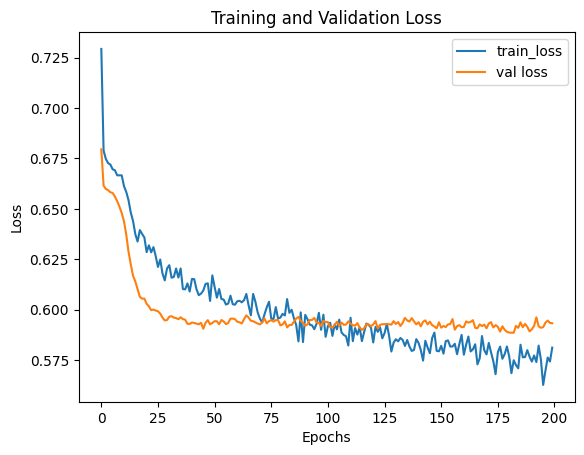

In [132]:
# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [133]:
!pip install catboost


In [134]:
!pip install optuna
!pip install scikit-plot

In [135]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

import optuna

import tensorflow as tf

In [136]:
def lr_objective(trial):
    tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
    C = trial.suggest_float('C', 0, 0.1)
    max_iter = trial.suggest_int('max_iter', 50, 600)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    model = LogisticRegression(
        solver= 'liblinear',
        penalty = penalty,
        tol= tol,
        C= C,
        max_iter= max_iter
    )

    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)

    return np.mean(cv_score)

study = optuna.create_study(direction= 'maximize')
study.optimize(lr_objective, n_trials= 100)

[I 2023-08-21 17:28:45,853] A new study created in memory with name: no-name-79075724-5513-42f3-8046-73443266ea43
[I 2023-08-21 17:28:47,107] Trial 0 finished with value: 0.5086991763022946 and parameters: {'tol': 7.201852526941773e-07, 'C': 0.03136002690515064, 'max_iter': 348, 'penalty': 'l1'}. Best is trial 0 with value: 0.5086991763022946.
[I 2023-08-21 17:28:47,510] Trial 1 finished with value: 0.48455425625295706 and parameters: {'tol': 0.03427076580401524, 'C': 0.06228780576600197, 'max_iter': 456, 'penalty': 'l1'}. Best is trial 0 with value: 0.5086991763022946.
[I 2023-08-21 17:28:47,701] Trial 2 finished with value: 0.5114189989370932 and parameters: {'tol': 0.0009564668261414159, 'C': 0.05967173633283244, 'max_iter': 508, 'penalty': 'l2'}. Best is trial 2 with value: 0.5114189989370932.
[I 2023-08-21 17:28:48,037] Trial 3 finished with value: 0.5078263893304518 and parameters: {'tol': 0.00020404418240405487, 'C': 0.09030646717411228, 'max_iter': 74, 'penalty': 'l1'}. Best is

In [137]:
import pandas as pd
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split

# Load and preprocess the data
df.dropna(inplace=True)
dep_var = 'Potability'
cat_cols = []
cont_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']

procs = [Categorify, FillMissing, Normalize]

# Split data into training and validation sets
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

# Create DataLoaders using fast.ai's TabularPandas
to = TabularPandas(df, procs=procs, cat_names=cat_cols, cont_names=cont_cols, y_names=dep_var, splits=splits)
dls = to.dataloaders(bs=64)

# Define the neural network architecture using Fastai
learn = tabular_learner(dls, layers=[200,100], metrics=rmse)

# Train the model with a predefined learning rate
learn.fit_one_cycle(25, lr_max=1e-2)

# Evaluate the model on the validation set
val_loss = learn.validate()[0]
print(f"Validation loss: {val_loss:.2f}")

Validation loss: 0.20


In [138]:
from fastai.tabular.all import *
import pandas as pd

# Define categorical and continuous column names

cat_cols = []
cont_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']


# Define procs (preprocessing steps)
procs = [Categorify, FillMissing, Normalize]

# Create DataLoaders using fast.ai's TabularPandas
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
to = TabularPandas(df, procs=procs, cat_names=cat_cols, cont_names=cont_cols, y_names='Potability', splits=splits)

dls = to.dataloaders(bs=64)

# Define the neural network architecture
learn = tabular_learner(dls, layers=[200,100], metrics=rmse)

# Train the model
learn.fit_one_cycle(25)

In [141]:
lr = LogisticRegression(
    solver = 'liblinear',
    tol = 0.008408625396645686,
    C = 0.08440490508701622,
    max_iter = 434,
    penalty = 'l1')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

LogisticRegression(C=0.08440490508701622, max_iter=434, penalty='l1',
                   solver='liblinear', tol=0.008408625396645686)

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'ROC Curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

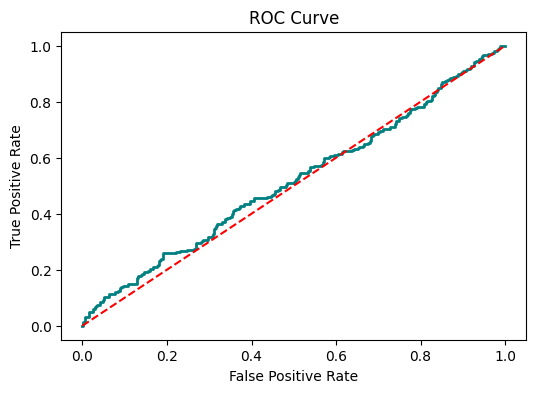

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()